<a href="https://colab.research.google.com/github/srilamaiti/ml_works/blob/main/bom_explode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%html
<div id="d3-example"></div>
<style>

.node circle {
  cursor: pointer;
  stroke: #3182bd;
  stroke-width: 1.5px;
}

.node text {
  font: 10px sans-serif;
  pointer-events: none;
  text-anchor: middle;
}

line.link {
  fill: none;
  stroke: #9ecae1;
  stroke-width: 1.5px;
}
</style>

In [ ]:
%%javascript
// We load the d3.js library from the Web.
require.config({paths:
    {d3: "http://d3js.org/d3.v3.min"}});
require(["d3"], function(d3) {
  // The code in this block is executed when the
  // d3.js library has been loaded.

  // First, we specify the size of the canvas
  // containing the visualization (size of the
  // <div> element).
  var width = 960,
    height = 500,
    root;

  // We create a color scale.
  var color = d3.scale.category10();

  // We create a force-directed dynamic graph layout.
//   var force = d3.layout.force()
//     .charge(-120)
//     .linkDistance(30)
//     .size([width, height]);
    var force = d3.layout.force()
    .linkDistance(80)
    .charge(-120)
    .gravity(.05)
    .size([width, height])
    .on("tick", tick);
var svg = d3.select("body").append("svg")
    .attr("width", width)
    .attr("height", height);

var link = svg.selectAll(".link"),
    node = svg.selectAll(".node");

  // In the <div> element, we create a <svg> graphic
  // that will contain our interactive visualization.
 var svg = d3.select("#d3-example").select("svg")
  if (svg.empty()) {
    svg = d3.select("#d3-example").append("svg")
          .attr("width", width)
          .attr("height", height);
  }
var link = svg.selectAll(".link"),
    node = svg.selectAll(".node");
  // We load the JSON file.
  d3.json("graph2.json", function(error, json) {
    // In this block, the file has been loaded
    // and the 'graph' object contains our graph.
 if (error) throw error;
else
    test(1);
root = json;
      test(2);
      console.log(root);
  update();



  });
    function test(rr){console.log('yolo'+String(rr));}

function update() {
    test(3);
  var nodes = flatten(root),
      links = d3.layout.tree().links(nodes);

  // Restart the force layout.
  force
      .nodes(nodes)
      .links(links)
      .start();

  // Update links.
  link = link.data(links, function(d) { return d.target.id; });

  link.exit().remove();

  link.enter().insert("line", ".node")
      .attr("class", "link");

  // Update nodes.
  node = node.data(nodes, function(d) { return d.id; });

  node.exit().remove();

  var nodeEnter = node.enter().append("g")
      .attr("class", "node")
      .on("click", click)
      .call(force.drag);

  nodeEnter.append("circle")
      .attr("r", function(d) { return Math.sqrt(d.size) / 10 || 4.5; });

  nodeEnter.append("text")
      .attr("dy", ".35em")
      .text(function(d) { return d.name; });

  node.select("circle")
      .style("fill", color);
}
    function tick() {
  link.attr("x1", function(d) { return d.source.x; })
      .attr("y1", function(d) { return d.source.y; })
      .attr("x2", function(d) { return d.target.x; })
      .attr("y2", function(d) { return d.target.y; });

  node.attr("transform", function(d) { return "translate(" + d.x + "," + d.y + ")"; });
}
          function color(d) {
  return d._children ? "#3182bd" // collapsed package
      : d.children ? "#c6dbef" // expanded package
      : "#fd8d3c"; // leaf node
}
      // Toggle children on click.
function click(d) {
  if (d3.event.defaultPrevented) return; // ignore drag
  if (d.children) {
    d._children = d.children;
    d.children = null;
  } else {
    d.children = d._children;
    d._children = null;
  }
  update();
}
    function flatten(root) {
  var nodes = [], i = 0;

  function recurse(node) {
    if (node.children) node.children.forEach(recurse);
    if (!node.id) node.id = ++i;
    nodes.push(node);
  }

  recurse(root);
  return nodes;
}

});

<IPython.core.display.Javascript object>

In [ ]:
!pip install -U treelib
!install pydot
!apt install libgraphviz-dev
!pip install pygraphviz
!pip install igraph

install: missing destination file operand after 'pydot'
Try 'install --help' for more information.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgraphviz-dev is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.2 MB/s eta 0:00:00


In [247]:
from treelib import Node, Tree
from posixpath import split
import operator as op
import pandas as pd
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import igraph
from igraph import Graph, EdgeSeq

In [ ]:
df = pd.read_csv("tree.csv")
df.columns = [col.lower().strip() for col in df.columns]
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.strip())
df['root_flag'] = np.where(((df['zerolevelmaterial'] ==  df['parentmaterial']) & (df['component'] ==  df['parentmaterial'])), 'Y', 'N')
df['component_leaf_flag'] = ~df['component'].isin(df['parentmaterial'])
df['component_seq'] = df.groupby(['component']).cumcount().add(1)
df = df.sort_values(by = ['root_flag'], ascending = [False])
df

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq
78,STDC411LB-TWZZ,STDC411LB-TWZZ,STDC411LB-TWZZ,Y,False,1
0,STDC411LB-TWZZ,000000000090583794,5145894-00,N,True,1
110,STDC411LB-TWZZ,N529563,486578-00,N,True,1
103,STDC411LB-TWZZ,N539161,000000000090610194,N,True,1
104,STDC411LB-TWZZ,N539161,N496282,N,False,1
...,...,...,...,...,...,...
54,STDC411LB-TWZZ,90580850-01,000000000090602163,N,True,1
55,STDC411LB-TWZZ,90584242-05,000000000090613672,N,True,1
56,STDC411LB-TWZZ,90584243-05,000000000090613672,N,True,2
57,STDC411LB-TWZZ,90587287-01,5148227-00,N,True,2


In [ ]:
root = df[df['root_flag'] == 'Y']['zerolevelmaterial'].values.tolist()[0]
root

'STDC411LB-TWZZ'

In [ ]:
df[(df.zerolevelmaterial == root) & (df.parentmaterial == root) & (df.root_flag == 'N')]

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq
79,STDC411LB-TWZZ,STDC411LB-TWZZ,N539161,N,False,1


In [ ]:
df[df.parentmaterial == 'N539161']

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq
103,STDC411LB-TWZZ,N539161,000000000090610194,N,True,1
104,STDC411LB-TWZZ,N539161,N496282,N,False,1
105,STDC411LB-TWZZ,N539161,N529563,N,False,1
102,STDC411LB-TWZZ,N539161,000000000090603120,N,False,1


In [ ]:
df[df.parentmaterial == '000000000090603120']

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq
150,STDC411LB-TWZZ,000000000090603120,5147384-00,N,True,1
146,STDC411LB-TWZZ,000000000090603120,90603175-01,N,True,1
147,STDC411LB-TWZZ,000000000090603120,000000000090603644,N,False,1
148,STDC411LB-TWZZ,000000000090603120,418345-00,N,True,1
149,STDC411LB-TWZZ,000000000090603120,418975-01,N,True,1
151,STDC411LB-TWZZ,000000000090603120,000000000090590301,N,True,1
152,STDC411LB-TWZZ,000000000090603120,90603378-01,N,True,1
153,STDC411LB-TWZZ,000000000090603120,000000000090603317,N,True,1
154,STDC411LB-TWZZ,000000000090603120,90551477-05,N,True,1
155,STDC411LB-TWZZ,000000000090603120,000000000090541186,N,True,1


In [ ]:
df_component_agg = df.groupby(['component']).agg({"parentmaterial":['count']}).reset_index()
df_component_agg.columns = ['component', 'total_parent_count']
df_component_agg.sort_values(by = ['total_parent_count'], ascending = False)

,component,total_parent_count
3,000000000090541536,6
91,5145894-00,6
6,000000000090556408,4
93,5148227-00,3
1,000000000090535533,2
...,...,...
44,000000000090616173,1
43,000000000090616172,1
42,000000000090616165,1
40,000000000090610194,1


In [ ]:
df[df.component == '000000000090541536']

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq
138,STDC411LB-TWZZ,000000000090585477,000000000090541536,N,True,6
1,STDC411LB-TWZZ,000000000090583794,000000000090541536,N,True,1
3,STDC411LB-TWZZ,000000000090583994,000000000090541536,N,True,2
69,STDC411LB-TWZZ,90569690-03,000000000090541536,N,True,3
71,STDC411LB-TWZZ,90569691-03,000000000090541536,N,True,4
73,STDC411LB-TWZZ,90569693-01,000000000090541536,N,True,5


In [ ]:
df[df.component == '000000000090613672']

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq
55,STDC411LB-TWZZ,90584242-05,000000000090613672,N,True,1
56,STDC411LB-TWZZ,90584243-05,000000000090613672,N,True,2


In [ ]:
df[df.component == '5145894-00']

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq
0,STDC411LB-TWZZ,000000000090583794,5145894-00,N,True,1
137,STDC411LB-TWZZ,000000000090585477,5145894-00,N,True,6
2,STDC411LB-TWZZ,000000000090583994,5145894-00,N,True,2
68,STDC411LB-TWZZ,90569690-03,5145894-00,N,True,3
70,STDC411LB-TWZZ,90569691-03,5145894-00,N,True,4
72,STDC411LB-TWZZ,90569693-01,5145894-00,N,True,5


In [ ]:
df['component_refined'] = df['component'] + '||' + df['component_seq'].astype(str)
df

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq,component_refined
78,STDC411LB-TWZZ,STDC411LB-TWZZ,STDC411LB-TWZZ,Y,False,1,STDC411LB-TWZZ||1
0,STDC411LB-TWZZ,000000000090583794,5145894-00,N,True,1,5145894-00||1
110,STDC411LB-TWZZ,N529563,486578-00,N,True,1,486578-00||1
103,STDC411LB-TWZZ,N539161,000000000090610194,N,True,1,000000000090610194||1
104,STDC411LB-TWZZ,N539161,N496282,N,False,1,N496282||1
...,...,...,...,...,...,...,...
54,STDC411LB-TWZZ,90580850-01,000000000090602163,N,True,1,000000000090602163||1
55,STDC411LB-TWZZ,90584242-05,000000000090613672,N,True,1,000000000090613672||1
56,STDC411LB-TWZZ,90584243-05,000000000090613672,N,True,2,000000000090613672||2
57,STDC411LB-TWZZ,90587287-01,5148227-00,N,True,2,5148227-00||2


In [ ]:
df['component_refined'] = np.where(df['component_seq'] == 1, df['component'], df['component_refined'])
df

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq,component_refined
78,STDC411LB-TWZZ,STDC411LB-TWZZ,STDC411LB-TWZZ,Y,False,1,STDC411LB-TWZZ
0,STDC411LB-TWZZ,000000000090583794,5145894-00,N,True,1,5145894-00
110,STDC411LB-TWZZ,N529563,486578-00,N,True,1,486578-00
103,STDC411LB-TWZZ,N539161,000000000090610194,N,True,1,000000000090610194
104,STDC411LB-TWZZ,N539161,N496282,N,False,1,N496282
...,...,...,...,...,...,...,...
54,STDC411LB-TWZZ,90580850-01,000000000090602163,N,True,1,000000000090602163
55,STDC411LB-TWZZ,90584242-05,000000000090613672,N,True,1,000000000090613672
56,STDC411LB-TWZZ,90584243-05,000000000090613672,N,True,2,000000000090613672||2
57,STDC411LB-TWZZ,90587287-01,5148227-00,N,True,2,5148227-00||2


In [ ]:
G1 = nx.DiGraph() # Create an empty undirected graph (or nx.DiGraph() for a directed graph)
G1.add_node(root)
# Add nodes from the 'source' and 'target' columns
G1.add_nodes_from(df[df.root_flag == 'N']['parentmaterial'])
G1.add_nodes_from(df[df.root_flag == 'N']['component_refined'])
# Add edges from the DataFrame
edges = [(row['parentmaterial'], row['component_refined']) for index, row in df[df.root_flag == 'N'][['parentmaterial','component_refined']].iterrows()]
G1.add_edges_from(edges)

In [ ]:
len(G1.nodes), len(G1.edges), nx.is_tree(G1), len(df), len(df.drop_duplicates())

(160, 159, True, 160, 160)

In [ ]:
for node in df_component_agg[df_component_agg.total_parent_count > 1]['component'].values.tolist():
    print(node, G1.out_degree(node))

000000000090535533 0
000000000090541536 0
000000000090556408 0
000000000090568521 0
000000000090613672 0
5145894-00 0
5148227-00 0


<ipython-input-118-d239affb4eb4>:6: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos=graphviz_layout(G1, prog='dot')#'dot', 'twopi', 'fdp', 'sfdp', 'circo', 'neato'


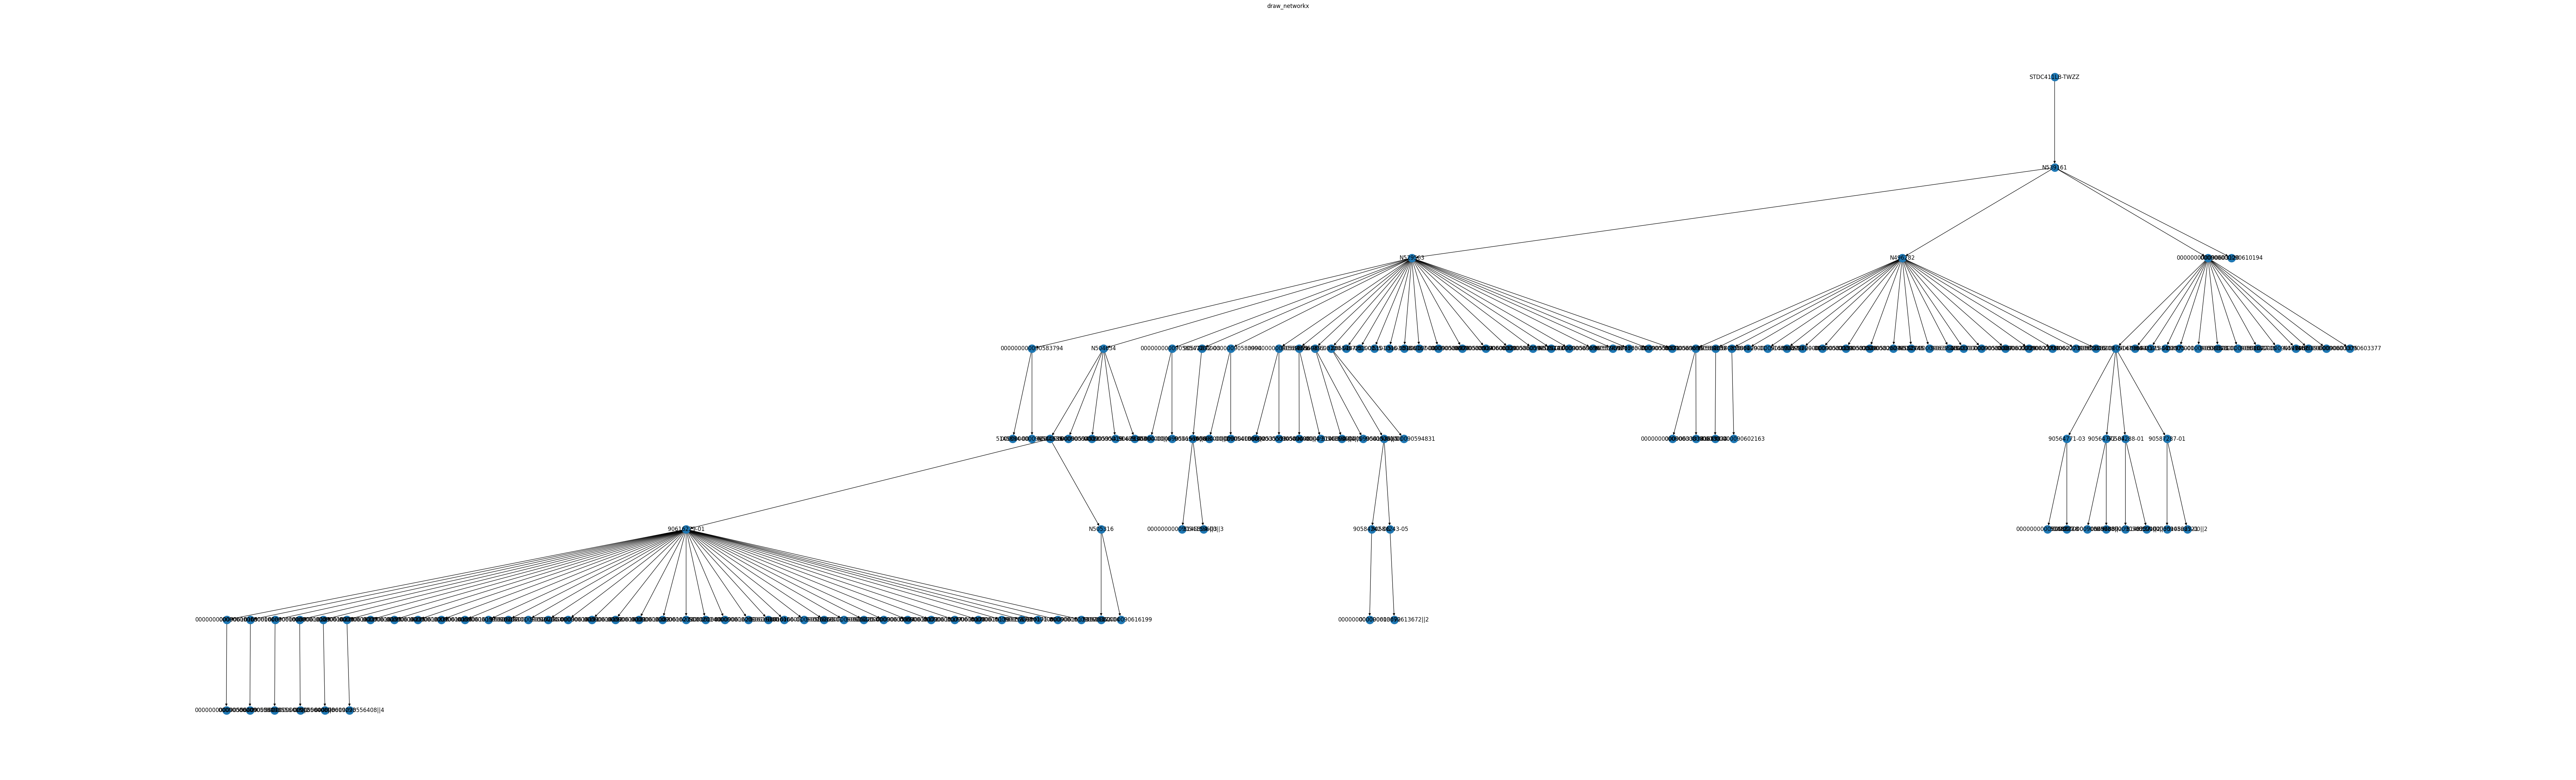

In [ ]:
nx.nx_agraph.write_dot(G1,'test.dot')
%matplotlib inline
fig = plt.figure(figsize=(100, 30))
# same layout using matplotlib with no labels
plt.title('draw_networkx')
pos=graphviz_layout(G1, prog='dot')#'dot', 'twopi', 'fdp', 'sfdp', 'circo', 'neato'
nx.draw(G1, pos, with_labels=True, arrows=True)
plt.savefig('nx_test1.png')

In [ ]:
'->'.join(str(x) for x in ['STDC411LB-TWZZ',
   'N539161',
   'N529563',
   'N504634',
   'N504639',
   'N505316',
   '90578362-04'])

'STDC411LB-TWZZ->N539161->N529563->N504634->N504639->N505316->90578362-04'

In [ ]:
paths = []
for node in G1:
    paths.append((node,
                  '->'.join(str(x).split("||")[0] for x in nx.shortest_path(G1, root, node)),
                  len(nx.shortest_path(G1, root, node)) - 1
                 )
                )
paths

[('STDC411LB-TWZZ', 'STDC411LB-TWZZ', 0),
 ('000000000090583794',
  'STDC411LB-TWZZ->N539161->N529563->000000000090583794',
  3),
 ('N529563', 'STDC411LB-TWZZ->N539161->N529563', 2),
 ('N539161', 'STDC411LB-TWZZ->N539161', 1),
 ('000000000090603644',
  'STDC411LB-TWZZ->N539161->000000000090603120->000000000090603644',
  3),
 ('N496282', 'STDC411LB-TWZZ->N539161->N496282', 2),
 ('000000000090603120', 'STDC411LB-TWZZ->N539161->000000000090603120', 2),
 ('N504634', 'STDC411LB-TWZZ->N539161->N529563->N504634', 3),
 ('N504639', 'STDC411LB-TWZZ->N539161->N529563->N504634->N504639', 4),
 ('000000000090585477',
  'STDC411LB-TWZZ->N539161->N529563->000000000090585477',
  3),
 ('90572092-03', 'STDC411LB-TWZZ->N539161->N529563->90572092-03', 3),
 ('90616229-01',
  'STDC411LB-TWZZ->N539161->N529563->N504634->N504639->90616229-01',
  5),
 ('90564771-03',
  'STDC411LB-TWZZ->N539161->000000000090603120->000000000090603644->90564771-03',
  4),
 ('000000000090583994',
  'STDC411LB-TWZZ->N539161->N52956

In [ ]:
df_component_agg[df_component_agg.total_parent_count > 1].sort_values(by = ['total_parent_count'], ascending = False)

,component,total_parent_count
3,000000000090541536,6
91,5145894-00,6
6,000000000090556408,4
93,5148227-00,3
1,000000000090535533,2
9,000000000090568521,2
41,000000000090613672,2


In [ ]:
for node in df_component_agg[df_component_agg.total_parent_count > 1].sort_values(by = ['total_parent_count'], ascending = False)['component'].values.tolist():
    node_counter = 0
    for p in paths:
        p_new = [e.split("||")[0] for e in p[1]]
        if node in p_new:
           node_counter += 1
    print(node, node_counter)
    node_counter = 0

000000000090541536 6
5145894-00 6
000000000090556408 4
5148227-00 3
000000000090535533 2
000000000090568521 2
000000000090613672 2


In [ ]:
paths[0]

('STDC411LB-TWZZ', 'STDC411LB-TWZZ', 0)

In [ ]:
df[(df.parentmaterial == 'STDC411LB-TWZZ') & (df.root_flag == 'N')]

,zerolevelmaterial,parentmaterial,component,root_flag,component_leaf_flag,component_seq,component_refined
79,STDC411LB-TWZZ,STDC411LB-TWZZ,N539161,N,False,1,N539161


In [ ]:
def last(n):
    return n[-1]
sorted_path = sorted(paths, key=last)

In [ ]:
df_traverse_path = pd.DataFrame(sorted_path)
df_traverse_path.columns = ['component', 'root_to_component_path', 'length_of_the_path']
df_traverse_path['finished_good'] = df_traverse_path['root_to_component_path'].apply(lambda x : x.split("->")[0])
df_traverse_path['component'] = df_traverse_path['component'].apply(lambda x : x.split("||")[0])
df_traverse_path['immediate_parent'] = df_traverse_path['root_to_component_path'].apply(lambda x : x.split("->")[-2] if "->" in x else x)
df_traverse_path = df_traverse_path[['finished_good', 'component', 'immediate_parent', 'root_to_component_path', 'length_of_the_path']]
df_traverse_path

,finished_good,component,immediate_parent,root_to_component_path,length_of_the_path
0,STDC411LB-TWZZ,STDC411LB-TWZZ,STDC411LB-TWZZ,STDC411LB-TWZZ,0
1,STDC411LB-TWZZ,N539161,STDC411LB-TWZZ,STDC411LB-TWZZ->N539161,1
2,STDC411LB-TWZZ,N529563,N539161,STDC411LB-TWZZ->N539161->N529563,2
3,STDC411LB-TWZZ,N496282,N539161,STDC411LB-TWZZ->N539161->N496282,2
4,STDC411LB-TWZZ,000000000090603120,N539161,STDC411LB-TWZZ->N539161->000000000090603120,2
...,...,...,...,...,...
155,STDC411LB-TWZZ,000000000090556408,000000000090616180,STDC411LB-TWZZ->N539161->N529563->N504634->N50...,7
156,STDC411LB-TWZZ,000000000090556408,000000000090616188,STDC411LB-TWZZ->N539161->N529563->N504634->N50...,7
157,STDC411LB-TWZZ,000000000090556408,000000000090616189,STDC411LB-TWZZ->N539161->N529563->N504634->N50...,7
158,STDC411LB-TWZZ,000000000090619223,000000000090616230,STDC411LB-TWZZ->N539161->N529563->N504634->N50...,7


In [ ]:
df_traverse_path[df_traverse_path['component'] == '000000000090541536']

,finished_good,component,immediate_parent,root_to_component_path,length_of_the_path
81,STDC411LB-TWZZ,000000000090541536,000000000090585477,STDC411LB-TWZZ->N539161->N529563->000000000090...,4
82,STDC411LB-TWZZ,000000000090541536,000000000090583794,STDC411LB-TWZZ->N539161->N529563->000000000090...,4
84,STDC411LB-TWZZ,000000000090541536,000000000090583994,STDC411LB-TWZZ->N539161->N529563->000000000090...,4
90,STDC411LB-TWZZ,000000000090541536,90569691-03,STDC411LB-TWZZ->N539161->N529563->90569691-03-...,4
92,STDC411LB-TWZZ,000000000090541536,90569693-01,STDC411LB-TWZZ->N539161->N529563->90569693-01-...,4
104,STDC411LB-TWZZ,000000000090541536,90569690-03,STDC411LB-TWZZ->N539161->N529563->90572092-03-...,5


In [248]:
df_prnt_chld = df_traverse_path[['immediate_parent', 'component']]
tuples = [tuple(x) for x in df_prnt_chld.values]

name_to_node = {}
root_dict = {'name': root, 'children': []}
grouped = df_prnt_chld.groupby('immediate_parent')
df_df_prnt_chld_grp_agg = grouped.aggregate(lambda x: list(pd.unique(x)))
for parent, child in tuples:
    parent_node = name_to_node.get(parent)
    if not parent_node:
        name_to_node[parent] = parent_node = {'name': parent}
        root_dict['children'].append(parent_node)
    name_to_node[child] = child_node = {'name': child}
    parent_node.setdefault('children', []).append(child_node)
print(json.dumps(root, indent=4))

{
    "name": {
        "name": {
            "name": "STDC411LB-TWZZ",
            "children": []
        },
        "children": []
    },
    "children": [
        {
            "name": "STDC411LB-TWZZ",
            "children": [
                {
                    "name": "STDC411LB-TWZZ",
                    "children": [
                        {
                            "name": "N539161",
                            "children": [
                                {
                                    "name": "N529563",
                                    "children": [
                                        {
                                            "name": "000000000090583794",
                                            "children": [
                                                {
                                                    "name": "5145894-00"
                                                },
                                                {
                  